## Pandas的Series数据类型

In [1]:
# 导入pandas包
import pandas as pd
data = pd.read_excel('data_excel.xlsx')
data

,id,age,place
0,1,11,21
1,2,12,22
2,3,13,23
3,4,14,24
4,5,15,25
5,6,16,26
6,7,17,27
7,8,18,28
8,9,19,29
9,10,20,30


In [2]:
type(data)

pandas.core.frame.DataFrame

In [3]:
data['id']

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: id, dtype: int64

In [4]:
type(data['id'])

pandas.core.series.Series

In [5]:
## 我们如果想要自己声明一个Series数据类型应该怎么办

In [6]:
obj = pd.Series([1,2,3,4,5])

In [7]:
obj

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [8]:
## 单独获取索引和值

# 单独获取值
obj.values

array([1, 2, 3, 4, 5])

In [9]:
# 单独获取索引
obj.index

RangeIndex(start=0, stop=5, step=1)

In [10]:
## 如果我们想要自己来自定义索引，该如何操作

In [11]:
d = pd.Series(['a','b','c','d'], index=[4,5,6,7])
d

4    a
5    b
6    c
7    d
dtype: object

In [12]:
# 通过索引的方式来获取值
d[4]

'a'

In [13]:
## 声明Series数据类型的第二种方法

In [14]:
d2 = {'a':10000,'b':20000,'c':30000}
obj = pd.Series(d2)
obj

a    10000
b    20000
c    30000
dtype: int64

In [15]:
## 结论：我们可以把一个字典类型的数据，直接变成Series类型

In [16]:
# 根据自己的需求，取出字典对应的值进行Series数据类型的转换
keys=['a','c']
obj1 = pd.Series(d2,index=keys)
obj1

a    10000
c    30000
dtype: int64

In [17]:
## 缺失值的发现

In [18]:
data = {'a':None,'b':20000,'c':30000}
obj = pd.Series(data)
obj

a        NaN
b    20000.0
c    30000.0
dtype: float64

In [19]:
obj.isnull()

a     True
b    False
c    False
dtype: bool

In [20]:
pd.isnull(obj)

a     True
b    False
c    False
dtype: bool

In [21]:
pd.notnull(obj)

a    False
b     True
c     True
dtype: bool

In [22]:
### 算数运算


In [23]:
d1 = pd.Series([1.3,1.5,2.6,-3.5], index=['a','b','c','d'])
d1


a    1.3
b    1.5
c    2.6
d   -3.5
dtype: float64

In [24]:
d2 = pd.Series([-1.3,-1.5,-2.6,3.9,9.8], index=['a','b','c','d','e'])
d2

a   -1.3
b   -1.5
c   -2.6
d    3.9
e    9.8
dtype: float64

In [25]:
d1+d2

a    0.0
b    0.0
c    0.0
d    0.4
e    NaN
dtype: float64

In [26]:
# 两个Series在进行运算的时候，不重叠的地方是空值，重叠的地方进行运算

In [27]:
## pandas读取超大文件的时候怎么办

In [28]:
## 基本思路是：分块操作。
## Python处理文件的时候，读取的是硬盘上的数据，而不需要把数据全部直接加载到内存中


In [29]:
# 以前的做法
data = pd.read_csv('executive.csv')
data.head()

,name:ID,sex,age,:LABEL
0,谢永林,男,50,people
1,胡跃飞,男,56,people
2,刘勇,男,49,people
3,朱季成,男,37,people
4,张丕杰,男,57,people


In [30]:
# nrows 参数的作用就是限制读取多少行
data = pd.read_csv('executive.csv', nrows=5)
data

,name:ID,sex,age,:LABEL
0,谢永林,男,50,people
1,胡跃飞,男,56,people
2,刘勇,男,49,people
3,朱季成,男,37,people
4,张丕杰,男,57,people


In [31]:
c = pd.read_csv('executive.csv', chunksize=100)
c

In [32]:
for a in c:
    print(a)

   name:ID sex  age  :LABEL
0      谢永林   男   50  people
1      胡跃飞   男   56  people
2       刘勇   男   49  people
3      朱季成   男   37  people
4      张丕杰   男   57  people
..     ...  ..  ...     ...
95      艾萍   女   39  people
96      张旸   男   39  people
97     于洪涛   男   51  people
98      梁旭   男   55  people
99     梁健锋   男   53  people

[100 rows x 4 columns]
    name:ID sex  age  :LABEL
100      林萌   男   52  people
101     雷菊芳   女   65  people
102     邓淑芬   女   54  people
103     陈劲松   男   54  people
104     黄伟中   男   50  people
..      ...  ..  ...     ...
195     钱震斌   男   59  people
196     杨振华   男   54  people
197      周中   男   51  people
198      张曦   男   44  people
199     符冠华   男   55  people

[100 rows x 4 columns]
    name:ID sex  age  :LABEL
200     黄国宏   男   49  people
201      高波   男   44  people
202     罗叶兰   女   41  people
203      张兵   男   47  people
204     王军华   男   57  people
..      ...  ..  ...     ...
295     梁永岑   男   50  people
296     王万强   男   41  people
297    

     name:ID sex  age  :LABEL
3600     何亚民   男   61  people
3601      杨振   男   56  people
3602      沈飒   女   45  people
3603      郝军   男   46  people
3604     范秀莲   女   55  people
...      ...  ..  ...     ...
3695     曾芳勤   女   53  people
3696     徐国群   男   56  people
3697      周晖   男   40  people
3698      窦刚   男   38  people
3699     孔令军   男   50  people

[100 rows x 4 columns]
     name:ID sex  age  :LABEL
3700     吴相君   男   43  people
3701     王一锋   男   34  people
3702     谭瑞清   男   52  people
3703     陈国狮   男   40  people
3704     贾春琳   男   45  people
...      ...  ..  ...     ...
3795     朱丽霞   女   37  people
3796     梁桂添   男   52  people
3797      赵刚   男   53  people
3798     祝恩福   男   56  people
3799     陈俊海   男   54  people

[100 rows x 4 columns]
     name:ID sex  age  :LABEL
3800     孙洁晓   男   51  people
3801      胡敏   男   58  people
3802     韩方如   女   54  people
3803     韩玉辉   男   54  people
3804     叶远璋   男   54  people
...      ...  ..  ...     ...
3895      郑戎   女   65 

In [33]:
## NumPy库

In [34]:
## numpy其实它就是一个多维的数组(列表)对象
## 其实每一个数组都有一个shape方法和一个dtype方法
## shape属性表示获取到列表的维度
## dtype属性表示获取到列表的类型

In [35]:
import numpy as np
## 命令行pip install numpy   如果在jupyter当中安装 !pip install numpy
## anaconda的环境，就不用安装了

In [36]:
data = [1,2,3,4]
data  # 这是一个数据类型，列表的

[1, 2, 3, 4]

In [37]:
n = np.array(data)
n  # 这是一个对象

array([1, 2, 3, 4])

In [38]:
n.shape

(4,)

In [39]:
n.dtype

dtype('int64')

In [40]:
n2 = np.array(data*10)
n2

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2,
       3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])

In [41]:
n2.shape

(40,)

In [42]:
n2.dtype

dtype('int64')

In [43]:
## 嵌套序列: 是由一组等长列表组成的列表
arr = [[1,2,3,4],[1,2,3,4]]
arr2 = np.array(arr)
arr2

array([[1, 2, 3, 4],
       [1, 2, 3, 4]])

In [44]:
arr2.shape

(2, 4)

In [45]:
arr2.ndim  # ndim代表了维度 

2

In [46]:
arr2.dtype

dtype('int64')

In [47]:
## 类型推断 ： numpy会对数据类型进行一个较为合理的推断

In [48]:
arr = [["1","2",3,4],[5,6,7,8]]
arr2 = np.array(arr)
arr2

array([['1', '2', '3', '4'],
       ['5', '6', '7', '8']], dtype='<U1')

In [49]:
arr2.dtype  # <U1   unicode类型

dtype('<U1')

In [50]:
arr = [[1.2,2,3,4],[5,6,7,8]]
arr2 = np.array(arr)
arr2

array([[1.2, 2. , 3. , 4. ],
       [5. , 6. , 7. , 8. ]])

In [51]:
arr2.dtype

dtype('float64')

In [52]:
## numpy还可以进行指定长度数组的创建
## 我们利用zeros/ones/empty这几个函数可以帮助我们创建一些默认的array对象


In [53]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [55]:
np.empty(3)

array([0.0e+000, 4.9e-324, 1.5e-323])

In [56]:
# arange 是range函数的数组版本

In [57]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [58]:
i = range(10)
type(i)

range

In [59]:
i

range(0, 10)

In [60]:
np.arange(10)# arange其实就是一个array range 这个意思。 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [61]:
### 数据类型转换




In [62]:
arr = np.array([1.2,1.6,1.8,-2.3,-5.8])
arr

array([ 1.2,  1.6,  1.8, -2.3, -5.8])

In [63]:
## 类型转换，转换成int
arr.astype(np.int32)


array([ 1,  1,  1, -2, -5], dtype=int32)

In [64]:
arr.dtype

dtype('float64')

In [65]:
# int32/ int64   
# 32位整型占4个字节
# 63位整型占8个字节


In [66]:
# float32 、 float64
# 双精度浮点数



## 矢量化操作到底是什么意思

#### 数组通常在不需要编写循环的情况下就可以进行批量运算，这就叫做矢量化操作


In [67]:
arr1 = np.array([1,2,3,4])
arr2 = np.array([5,6,7,8])
arr1 + arr2

array([ 6,  8, 10, 12])

In [68]:
arr1 = np.array([[1,2,3,4],[5,6,7,8]])
arr2 = np.array([[2,3,4,5],[6,7,8,9]])
arr1 + arr2

array([[ 3,  5,  7,  9],
       [11, 13, 15, 17]])

In [69]:
arr1 - arr2

array([[-1, -1, -1, -1],
       [-1, -1, -1, -1]])

In [70]:
arr1 * arr2

array([[ 2,  6, 12, 20],
       [30, 42, 56, 72]])

In [71]:
arr1 / arr2

array([[0.5       , 0.66666667, 0.75      , 0.8       ],
       [0.83333333, 0.85714286, 0.875     , 0.88888889]])

In [72]:
5 * arr1

array([[ 5, 10, 15, 20],
       [25, 30, 35, 40]])

In [73]:
### 基本的索引和切片操作



In [74]:
## 现在我们有一组列表(数组)
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [75]:
arr[3]

3

In [76]:
## 现在我们要访问4及以后的元素
arr[4:]

array([4, 5, 6, 7, 8, 9])

In [77]:
arr[0:4] = 9 # 将一个标量的值赋值给一个切片时，该值会自动的传播到整个区域，并且直接影响原数据的值

In [78]:
arr

array([9, 9, 9, 9, 4, 5, 6, 7, 8, 9])

In [79]:
## 我们如果不想影响原数据操作的话怎么办？


In [80]:
a = arr.copy()
a

array([9, 9, 9, 9, 4, 5, 6, 7, 8, 9])

In [81]:
## 如果我们有一个二维的数组该怎么访问呢？



In [82]:
arr1 = np.array([[1,2,3,4],[5,6,7,8]])
arr1

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [83]:
arr1[0]

array([1, 2, 3, 4])

In [84]:
arr1[0][1]

2

In [85]:
arr1[0,2]

3

In [86]:
### 比较运算

In [87]:
#在以前我们学习多条件运算的时候，我们使用的是and 和or


In [88]:
names = np.array(['HanMeiMei','LiLei','Tony','Jack'])
names

array(['HanMeiMei', 'LiLei', 'Tony', 'Jack'], dtype='<U9')

In [89]:
names == 'HanMeiMei'

array([ True, False, False, False])

In [90]:
(names == 'HanMeiMei') & (names == 'Tony')

array([False, False, False, False])

In [91]:
(names == 'HanMeiMei') | (names == 'Tony')

array([ True, False,  True, False])

In [92]:
## 这一点需要记住，我们以后进行多条件筛选的时候会用到
## 我们使用numpy对象进行多条件的比较运算的时候，我们不能够使用and 和 or
## 必须使用 & 和 | 他们分别代表着and  和or

In [93]:
## 花式索引(fancy indexing) ，它是一个NumPy中的术语，它指的是利用整数数组来进行索引的方式

In [94]:
arr = np.empty((8,4)) # 声明一个8*4的空的列表
arr

array([[ 0.00000000e+000,  1.49166825e-154,  8.39911598e-323,
         0.00000000e+000],
       [ 1.69376082e+190,  5.02034658e+175,  6.09993028e+170,
         2.90192626e-057],
       [ 4.08386492e-033,  2.38545463e+180,  1.47763641e+248,
         1.16096346e-028],
       [ 7.69165785e+218,  1.35617292e+248,  8.20984546e-067,
         3.64055199e+175],
       [ 5.39851236e-066,  5.24551044e+174,  4.30696657e-096,
         6.32299154e+233],
       [ 6.48224638e+170,  5.22411352e+257,  5.74020278e+180,
         8.37174974e-144],
       [ 1.41529402e+161,  6.00736899e-067,  3.67137505e+097,
         9.18440293e-072],
       [ 3.92682017e+126, -1.71427944e-141,  1.49166824e-154,
        -2.68156177e+154]])

In [95]:
# 赋值
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [96]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [97]:
## 以一个特定的顺序来选取行中的子集，我们传入一个用于指定顺序的整数列表，或数组
# 这里也可以使用负数来进行索引

In [98]:
arr = np.arange(32).reshape((8,4)) ## reshape就是把这个32个元素的列表变成了8*4的列表
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [99]:
arr[[1,5,7,2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [100]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

In [101]:
##行 和 列同时进行花式索引操作

arr[[1,5,7,2]][:,[0,3,1]]

array([[ 4,  7,  5],
       [20, 23, 21],
       [28, 31, 29],
       [ 8, 11,  9]])

In [102]:
## 转置操作

In [103]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [104]:
arr.transpose()

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [105]:
a = arr.T

In [106]:
a

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [107]:
## numpy的降维操作

In [108]:
arr = np.array([[1,100,1000],[2,200,2000],[3,300,3000]])
arr

array([[   1,  100, 1000],
       [   2,  200, 2000],
       [   3,  300, 3000]])

In [109]:
## 默认排序的降维
arr.ravel()

array([   1,  100, 1000,    2,  200, 2000,    3,  300, 3000])

In [110]:
arr.reshape(-1)

array([   1,  100, 1000,    2,  200, 2000,    3,  300, 3000])

In [111]:
arr.flatten()

array([   1,  100, 1000,    2,  200, 2000,    3,  300, 3000])

In [112]:
## 改变排序模式的降维操作



In [113]:
arr.ravel(order="F")

array([   1,    2,    3,  100,  200,  300, 1000, 2000, 3000])

In [114]:
arr.reshape(-1,order="F")

array([   1,    2,    3,  100,  200,  300, 1000, 2000, 3000])

In [115]:
arr.flatten(order="F")

array([   1,    2,    3,  100,  200,  300, 1000, 2000, 3000])

In [116]:
## 降维后的值的修改

In [117]:
arr = np.array([[1,100,1000],[2,200,2000],[3,300,3000]])
arr

array([[   1,  100, 1000],
       [   2,  200, 2000],
       [   3,  300, 3000]])

In [118]:
arr.flatten()

array([   1,  100, 1000,    2,  200, 2000,    3,  300, 3000])

In [119]:
arr.flatten()[0] = 200

In [120]:
arr

array([[   1,  100, 1000],
       [   2,  200, 2000],
       [   3,  300, 3000]])

In [121]:
## flatten方法降维之后对值修改不改变原数据

In [122]:
arr.ravel()

array([   1,  100, 1000,    2,  200, 2000,    3,  300, 3000])

In [123]:
arr.ravel()[1] = 1000

In [124]:
arr

array([[   1, 1000, 1000],
       [   2,  200, 2000],
       [   3,  300, 3000]])

In [125]:
# ravel方法降维之后进行值的修改会改变原来的数据

In [126]:
arr.reshape(-1)

array([   1, 1000, 1000,    2,  200, 2000,    3,  300, 3000])

In [127]:
arr.reshape(-1)[2]=3000

In [128]:
arr

array([[   1, 1000, 3000],
       [   2,  200, 2000],
       [   3,  300, 3000]])

In [129]:
## reshape本质还是形状上的改变，同时降维后改变值也修改原数据

In [130]:
## numpy的堆叠操作
## 其实就是数据的合并

In [131]:
arr1 = np.array([[1,100,1000],[2,200,2000],[3,300,3000]])
arr1

array([[   1,  100, 1000],
       [   2,  200, 2000],
       [   3,  300, 3000]])

In [132]:
arr2 = np.array([1,2,3])
arr2

array([1, 2, 3])

In [133]:
## 纵向堆叠
np.vstack([arr1,arr2])


array([[   1,  100, 1000],
       [   2,  200, 2000],
       [   3,  300, 3000],
       [   1,    2,    3]])

In [134]:
np.row_stack([arr1,arr2])

array([[   1,  100, 1000],
       [   2,  200, 2000],
       [   3,  300, 3000],
       [   1,    2,    3]])

In [135]:
arr3 = np.array([[5],[6],[7]])
arr3

array([[5],
       [6],
       [7]])

In [136]:
## 横线堆叠
np.hstack([arr1,arr3])

array([[   1,  100, 1000,    5],
       [   2,  200, 2000,    6],
       [   3,  300, 3000,    7]])

In [137]:
np.column_stack([arr1,arr3])

array([[   1,  100, 1000,    5],
       [   2,  200, 2000,    6],
       [   3,  300, 3000,    7]])

## 广播运算

In [138]:
import numpy as np

## 利用随机数生成两个维度一致的数组

arr1 = np.arange(12).reshape(3,4)
arr1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [139]:
arr2 = np.arange(101,113).reshape(3,4)
arr2

array([[101, 102, 103, 104],
       [105, 106, 107, 108],
       [109, 110, 111, 112]])

In [140]:
## 这并不是广播运算，因为其维度一致
arr1 + arr2

array([[101, 103, 105, 107],
       [109, 111, 113, 115],
       [117, 119, 121, 123]])

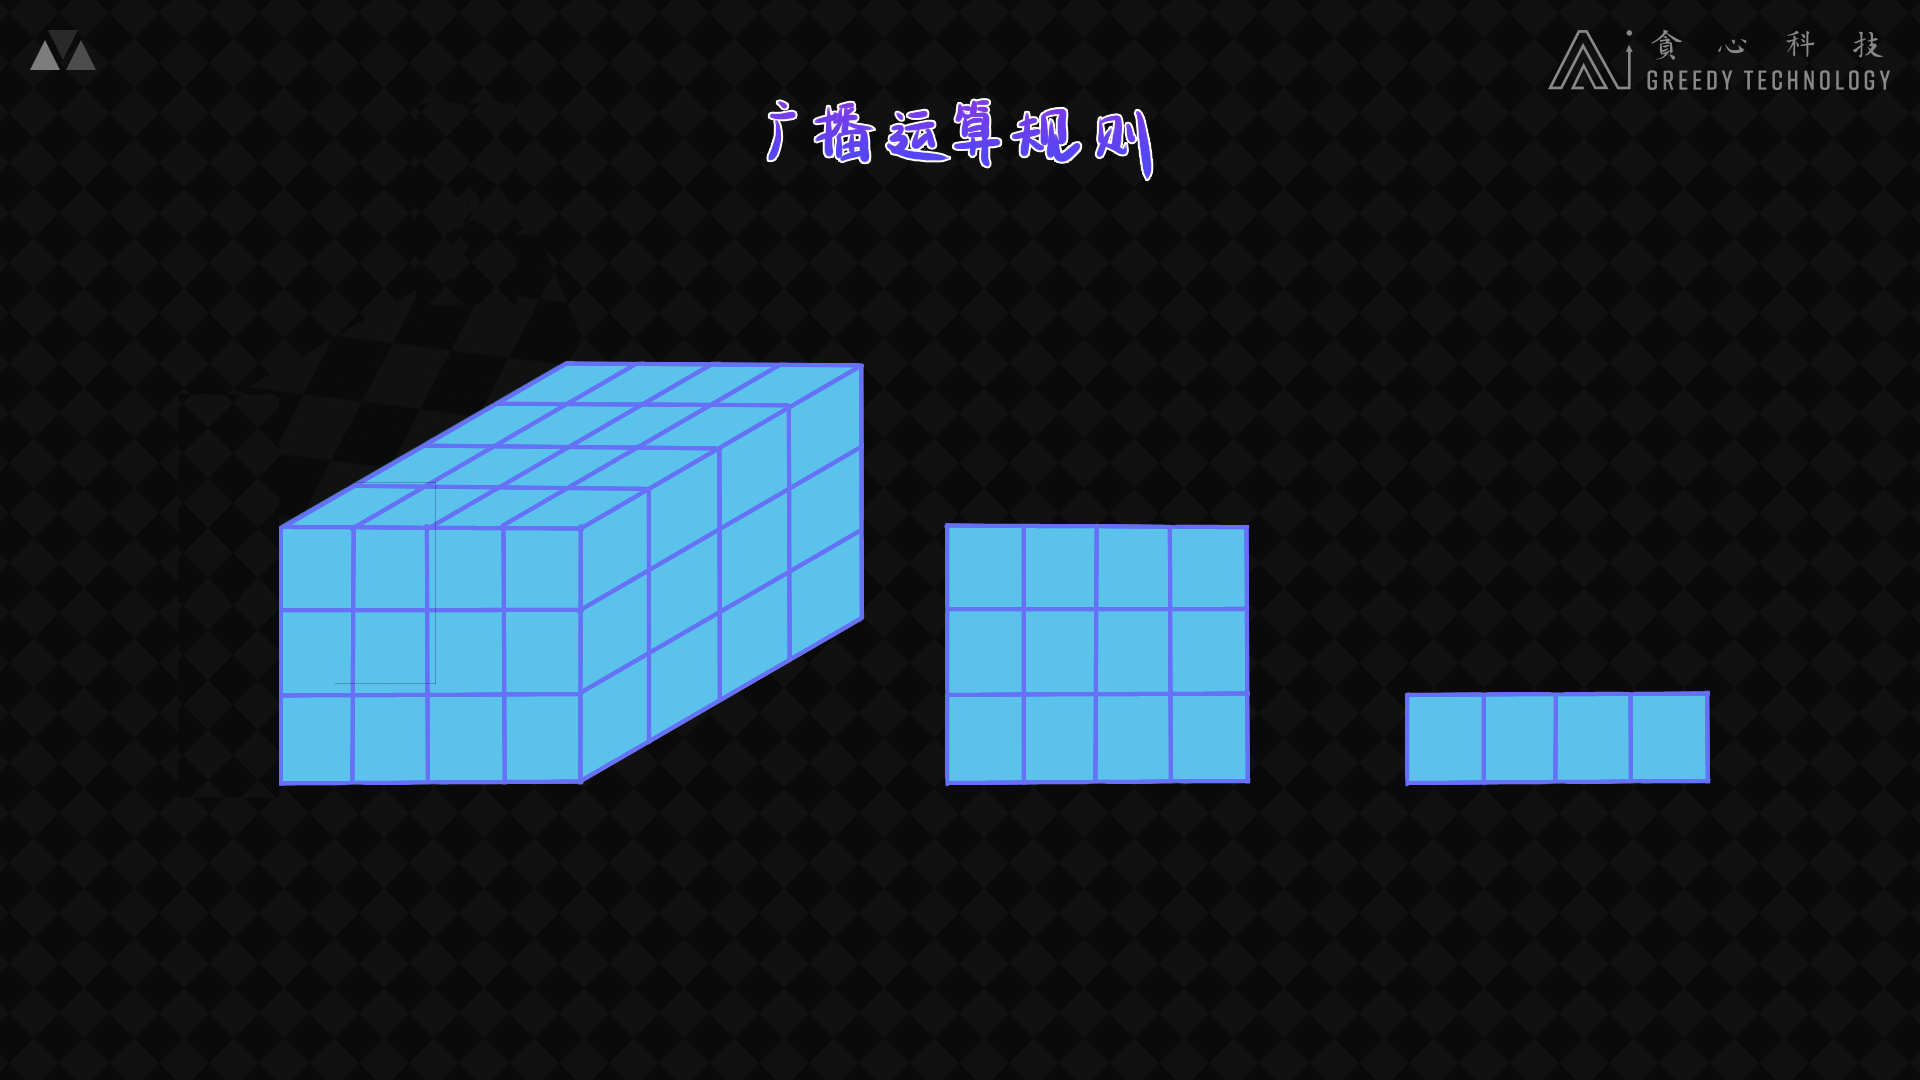

In [141]:
arr1 = np.arange(60).reshape(5,4,3)
arr1

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]],

       [[48, 49, 50],
        [51, 52, 53],
        [54, 55, 56],
        [57, 58, 59]]])

In [142]:
arr2 = np.arange(12).reshape(4,3)
arr2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [143]:
# 维数不一直，但是末尾的维度值是一致的
arr1 + arr2

array([[[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16],
        [18, 20, 22]],

       [[12, 14, 16],
        [18, 20, 22],
        [24, 26, 28],
        [30, 32, 34]],

       [[24, 26, 28],
        [30, 32, 34],
        [36, 38, 40],
        [42, 44, 46]],

       [[36, 38, 40],
        [42, 44, 46],
        [48, 50, 52],
        [54, 56, 58]],

       [[48, 50, 52],
        [54, 56, 58],
        [60, 62, 64],
        [66, 68, 70]]])

In [144]:
arr1 = np.arange(60).reshape(5,4,3)
arr1

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]],

       [[48, 49, 50],
        [51, 52, 53],
        [54, 55, 56],
        [57, 58, 59]]])

In [145]:
arr2 = np.arange(4).reshape(4,1)
arr2

array([[0],
       [1],
       [2],
       [3]])

In [146]:
arr1+arr2

array([[[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14]],

       [[12, 13, 14],
        [16, 17, 18],
        [20, 21, 22],
        [24, 25, 26]],

       [[24, 25, 26],
        [28, 29, 30],
        [32, 33, 34],
        [36, 37, 38]],

       [[36, 37, 38],
        [40, 41, 42],
        [44, 45, 46],
        [48, 49, 50]],

       [[48, 49, 50],
        [52, 53, 54],
        [56, 57, 58],
        [60, 61, 62]]])

In [147]:
## 自动补齐
arr1 = np.arange(12).reshape(4,3)
arr2 = np.array([1,2,3])
arr1


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [148]:
arr2

array([1, 2, 3])

In [149]:
arr1 + arr2

array([[ 1,  3,  5],
       [ 4,  6,  8],
       [ 7,  9, 11],
       [10, 12, 14]])

In [150]:
## 像下面这种情况是不可以做运算的情况
arr1 = np.arange(60).reshape(5,4,3)
arr2 = np.arange(8).reshape(4,2)
arr2

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [151]:
arr1 + arr2

ValueError: operands could not be broadcast together with shapes (5,4,3) (4,2) 

## 条件逻辑转数组

- x if condition else y
- 当条件condition成立的时候，表达式返回的值是x，不成立的时候返回的是y
- np.where 一般用于根据一个数组产生一个新的数组

In [152]:
x_arr = np.array([1.1,1.2,1.3])
y_arr = np.array([2.1,2.2,2.3])
condition = np.array([True,False,True])

result = [(x if c else y) for x,y,c in zip(x_arr,y_arr,condition)]
## zip的参数是可迭代的对象
## zip就会将对象中对应的元素打包成一个个的元组，然后返回由这些元组组成的列表

In [153]:
result

[1.1, 2.2, 1.3]

In [155]:
result = np.where(condition,x_arr,y_arr)
result

array([1.1, 2.2, 1.3])

In [156]:
## 值的替换
arr = np.random.randn(4,4)
arr

array([[ 0.87606132, -0.231048  , -1.07355268, -0.89246651],
       [-0.08804727, -0.30132327,  0.28206941,  1.09189751],
       [-0.75803511,  0.83917468, -1.68988666, -0.93955701],
       [-0.38754202,  2.08316743, -0.51492851,  0.67055673]])

In [158]:
# np.where 支持3个参数，第一个参数是条件，第二个参数是条件成立的时候返回的值
# 第三个参数是条件不成立的时候返回的值
arr_1 = np.where(arr>0.2,2,-2)
arr_1

array([[ 2, -2, -2, -2],
       [-2, -2,  2,  2],
       [-2,  2, -2, -2],
       [-2,  2, -2,  2]])

In [160]:
arr_2 = np.where(arr>0,2,arr)
arr_2

array([[ 2.        , -0.231048  , -1.07355268, -0.89246651],
       [-0.08804727, -0.30132327,  2.        ,  2.        ],
       [-0.75803511,  2.        , -1.68988666, -0.93955701],
       [-0.38754202,  2.        , -0.51492851,  2.        ]])